In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statistics as stats
import math
data = pd.read_excel("https://github.com/junaart/ForStudents/blob/master/Big_Data/Seminar_6/data.xlsx?raw=true")
display(data)

,Номер банка,Капитал,Работающие активы,Уставной капитал
0,1,20.7,11.7,2.4
1,2,19.9,19.8,17.5
2,3,9.3,2.6,2.7
3,4,59.3,43.6,2.1
4,5,24.7,29.0,23.1
5,6,47.7,98.5,18.7
6,7,24.2,25.6,5.3
7,8,7.8,6.2,2.2
8,9,38.3,79.8,6.8
9,10,10.3,10.1,3.5


[17, 6, 4, 3] 
 [2.1, 7.35, 12.6, 17.85, 23.1]
['2.1-7.35', '7.35-12.6', '12.6-17.85', '17.85-23.1']


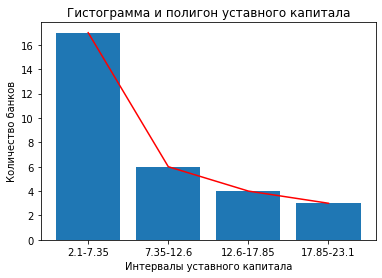

In [3]:
#Пункт №1
g=np.histogram(data['Уставной капитал'], bins='fd')
print(list(g[0]),"\n",list(g[1]))
arr=[]
for i in range(len(g[1]) - 1):
    arr.append(str(g[1][i]) + '-' + str(g[1][i+1]))
print(arr)
plt.bar(arr,g[0])
plt.title('Гистограмма и полигон уставного капитала')
plt.xlabel("Интервалы уставного капитала")
plt.ylabel("Количество банков")
plt.plot(arr, g[0], color = 'red')
#plt.show()
#plt.hist(data["Уставной капитал"])

[13, 8, 2, 2, 3, 2] 
 [2.6, 23.450000000000003, 44.300000000000004, 65.15, 86.0, 106.85, 127.7]
['2.6-23.450000000000003', '23.450000000000003-44.300000000000004', '44.300000000000004-65.15', '65.15-86.0', '86.0-106.85', '106.85-127.7']


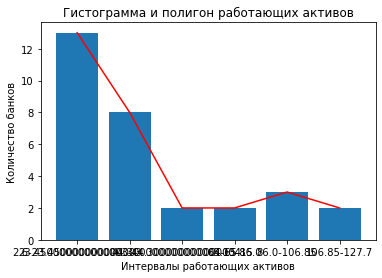

In [6]:
g=np.histogram(data['Работающие активы'], bins='fd')
print(list(g[0]),"\n",list(g[1]))
g[0]
arr=[]
for i in range(len(g[1]) - 1):
    arr.append(str(g[1][i]) + '-' + str(g[1][i+1]))
print(arr)
plt.bar(arr,g[0])
plt.title('Гистограмма и полигон работающих активов')
plt.xlabel("Интервалы работающих активов")
plt.ylabel("Количество банков")
plt.plot(arr, g[0], color = 'red')

[13, 8, 4, 4, 1] 
 [6.8, 20.46, 34.12, 47.78, 61.44, 75.1]
['6.8-20.46', '20.46-34.12', '34.12-47.78', '47.78-61.44', '61.44-75.1']


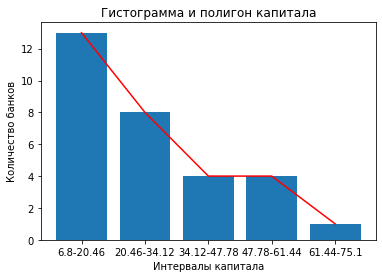

In [7]:
g=np.histogram(data['Капитал'], bins='fd')
print(list(g[0]),"\n",list(g[1]))
g[0]
arr=[]
for i in range(len(g[1])-1):
    arr.append(str(g[1][i]) + '-' + str(g[1][i+1]))
print(arr)
plt.bar(arr,g[0])
plt.title('Гистограмма и полигон капитала')
plt.xlabel("Интервалы капитала")
plt.ylabel("Количество банков")
plt.plot(arr, g[0], color = 'red')

In [4]:
#Пункт №2
g = np.histogram(data['Уставной капитал'], bins = 'fd')
display(g)
newd = pd.DataFrame(columns = ["Sum", "Avg", "R", "d", "imq", "Sigma", "Kv"])
for temp in range(len(g[0])):
    tt = data[(g[1][temp] <= data['Уставной капитал']) & (data['Уставной капитал'] < g[1][temp + 1])]['Работающие активы']
    Sum = tt.sum()
    Avg = tt.mean()
    R = tt.max() - tt.min()
    d = (tt - tt.mean()).abs().sum() / tt.std()
    imq = np.quantile(tt, 0.75) - np.quantile(tt, 0.25)
    Sigma = tt.std()
    Kv = Sigma/Avg*100
    res = pd.Series([Sum, Avg, R, d, imq, Sigma, Kv], index = newd.columns)
    newd = newd.append(res, ignore_index = True)
display(newd)

(array([17,  6,  4,  3], dtype=int64),
 array([ 2.1 ,  7.35, 12.6 , 17.85, 23.1 ]))

,Sum,Avg,R,d,imq,Sigma,Kv
0,451.4,26.552941,77.2,12.476717,20.000,21.541301,81.125857
1,343.9,57.316667,118.6,4.824295,66.525,47.578626,83.010107
2,227.4,56.850000,104.4,2.862816,43.650,47.051567,82.764411
3,188.9,94.450000,8.1,1.414214,4.050,5.727565,6.064124


In [5]:
#Пункт №3
g = np.histogram(data['Капитал'], bins = 4)
newd = pd.DataFrame(columns = ['Sum','Avg','Median','Dispersion','Sigma','d_Median','Ko','Kv'])
for temp in range(len(g[0])):
    tt = data[(g[1][temp]<=data['Капитал']) & (data['Капитал']<g[1][temp + 1])]['Капитал']
    Sum = tt.sum()
    Avg = tt.mean()
    Median = stats.median(tt)
    Sigma = tt.std()
    Dispersion = Sigma**2
    d_Median = (tt - Median).abs().sum() / tt.std()
    Ko = (tt.max()-tt.min())/Avg*100
    Kv = Sigma/Avg*100
    res = pd.Series([Sum, Avg,Median, Dispersion, Sigma, d_Median, Ko, Kv], index = newd.columns)
    newd = newd.append(res, ignore_index = True)
display(newd)

,Sum,Avg,Median,Dispersion,Sigma,d_Median,Ko,Kv
0,263.9,14.661111,14.20,33.794281,5.813285,15.671002,113.906783,39.651053
1,146.9,29.380000,24.70,49.297000,7.021182,3.674595,48.672566,23.897829
2,201.2,50.300000,51.75,49.753333,7.053604,3.232390,29.224652,14.023070
3,120.0,60.000000,60.00,0.980000,0.989949,1.414214,2.333333,1.649916


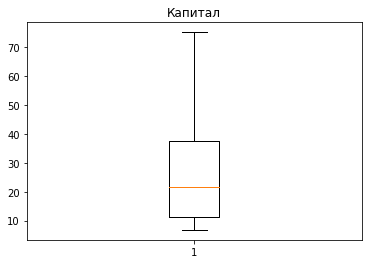

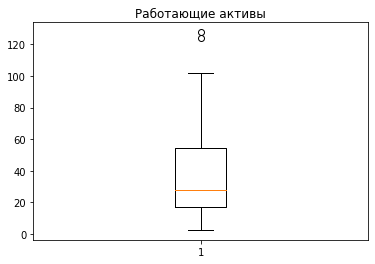

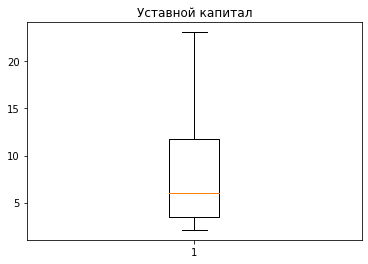

,Avg,AvgGeom,AvgHarm,Median,Sigma,Disp,Kv
0,26.903333,21.368519,17.193918,21.55,18.895000,357.021023,70.232933
1,41.353333,28.218637,17.776105,28.15,35.922318,1290.412920,133.523669
2,8.330000,6.432275,5.021340,6.00,6.079709,36.962862,22.598349


In [6]:
#Пункт №4
def my_gmean(x):
    r = 1
    for i in x:
        r *= i
    return r**(1 / len(x))

newframe = pd.DataFrame(columns = ['Avg','AvgGeom','AvgHarm','Median','Sigma','Disp','Kv'])

#Капитал
Avg = data['Капитал'].mean()
AvgGeom = my_gmean(data['Капитал'])
AvgHarm = stats.harmonic_mean(data['Капитал'])
Median = data['Капитал'].median()
Sigma = data['Капитал'].std()
Disp = Sigma**2
Kv = Sigma / Avg * 100
newframe = newframe.append(pd.Series([Avg, AvgGeom, AvgHarm, Median, Sigma, Disp, Kv], index = newframe.columns), ignore_index = True)
#display(newframe)
plt.boxplot(data['Капитал'])
plt.title("Капитал")
plt.show()

#Работающие активы
Avg_col2 = data["Работающие активы"].mean()
AvgHarm_col2 = stats.harmonic_mean(data["Работающие активы"])
AvgGeom_col2 = my_gmean(data["Работающие активы"])
Med_col2 = stats.median(data["Работающие активы"])
Sigma = data['Работающие активы'].std()
Disp = Sigma**2
Kv = Sigma / Avg * 100
newframe = newframe.append(pd.Series([Avg_col2, AvgGeom_col2, AvgHarm_col2, Med_col2, Sigma, Disp, Kv], index = newframe.columns), ignore_index = True)
#display(newframe)
plt.boxplot(data["Работающие активы"])
plt.title("Работающие активы")
plt.show()

#Уставной капитал
Avg_col2 = data["Уставной капитал"].mean()
AvgHarm_col2 = stats.harmonic_mean(data["Уставной капитал"])
AvgGeom_col2 = my_gmean(data["Уставной капитал"])
Med_col2 = stats.median(data["Уставной капитал"])
Sigma = data['Уставной капитал'].std()
Disp = Sigma**2
Kv = Sigma / Avg * 100
newframe = newframe.append(pd.Series([Avg_col2, AvgGeom_col2, AvgHarm_col2, Med_col2, Sigma, Disp, Kv], index = newframe.columns), ignore_index = True)
plt.boxplot(data["Уставной капитал"])
plt.title("Уставной капитал")
plt.show()
display(newframe)

In [7]:
#Пункт №5
newframe = pd.DataFrame(columns = ['Ka', 'Ke'])

for col in range(1,len(data.columns)):
    series = data.iloc[:,col]
    m3 = ((series - series.mean())**3).sum() / len(series)
    Ka = m3 / (series.std())**3
    m4 = ((series - series.mean())**4).sum() / len(series)
    Ke = m4 / (series.std())**4-3
    newframe = newframe.append(pd.Series([Ka, Ke], index = newframe.columns), ignore_index = True)
display(newframe)

,Ka,Ke
0,0.961832,-0.279018
1,1.080707,-0.096381
2,0.903481,-0.409458


In [8]:
newframe = pd.DataFrame(columns = ['Ka', 'Ke'])
capital = pd.Series(data["Капитал"])
m3 = ((capital - capital.mean())**3).sum() / len(capital)
Ka = m3 / (capital.std())**3
m4 = ((capital - capital.mean())**4).sum() / len(capital)
Ke = m4 / (capital.std())**4-3
newframe = newframe.append(pd.Series([Ka, Ke], index = newframe.columns), ignore_index = True)

ustav_cap = pd.Series(data["Уставной капитал"])
m3 = ((ustav_cap - ustav_cap.mean())**3).sum() / len(ustav_cap)
Ka = m3 / (ustav_cap.std())**3
m4 = ((ustav_cap - ustav_cap.mean())**4).sum() / len(ustav_cap)
Ke = m4 / (ustav_cap.std())**4-3
newframe = newframe.append(pd.Series([Ka, Ke], index = newframe.columns), ignore_index = True)

rab_act = pd.Series(data["Работающие активы"])
m3 = ((rab_act - rab_act.mean())**3).sum() / len(rab_act)
Ka = m3 / (rab_act.std())**3
m4 = ((rab_act - rab_act.mean())**4).sum() / len(rab_act)
Ke = m4 / (rab_act.std())**4-3
newframe = newframe.append(pd.Series([Ka, Ke], index = newframe.columns), ignore_index = True)
display(newframe)

,Ka,Ke
0,0.961832,-0.279018
1,0.903481,-0.409458
2,1.080707,-0.096381


In [9]:
#Пункт №6
g = np.histogram(data['Уставной капитал'], bins = 'fd')
display(g)
newd = pd.DataFrame(columns = ["Avg", "Median", "Modal", "Sigma"])
for temp in range(len(g[0])):
    tt = data[(g[1][temp] <= data['Уставной капитал']) & (data['Уставной капитал'] < g[1][temp + 1])]['Уставной капитал']
    Avg = tt.mean()
    Median = tt.median()
    Modal = tt.mode()
    Sigma = tt.std()
    newd = newd.append(pd.Series([Avg, Median, Modal, Sigma], index = newd.columns), ignore_index = True)
display(newd)

(array([17,  6,  4,  3], dtype=int64),
 array([ 2.1 ,  7.35, 12.6 , 17.85, 23.1 ]))

,Avg,Median,Modal,Sigma
0,3.988235,3.60,0 2.2 1 2.9 dtype: float64,1.534146
1,9.683333,9.45,0 7.5 1 8.9 2 9.0 3 9.9 4 1...,1.598020
2,15.425000,15.40,0 13.4 1 13.6 2 17.2 3 17.5 dtype:...,2.227667
3,19.600000,19.60,0 18.7 1 20.5 dtype: float64,1.272792


In [44]:
g = np.histogram(data["Уставной капитал"], bins = 'fd')
display(g)
newd = pd.DataFrame(columns = ["Интервал", "Частота"])
for i in range(len(g[0])):
    s = pd.Series([str(g[1][i]) + '-' + str(g[1][i+1]),g[0][i]], index=newd.columns)
    newd = newd.append(s, ignore_index=True)
display(newd)

s=[]
for i in range(len(newd.index)):
    a = np.array(newd.iloc[i,0].split('-'),dtype='float64')
    s.append((a[0]+a[1])/2)

s = pd.Series(s)
newd['interval mid'] = s
display(newd)

(array([17,  6,  4,  3], dtype=int64),
 array([ 2.1 ,  7.35, 12.6 , 17.85, 23.1 ]))

,Интервал,Частота
0,2.1-7.35,17
1,7.35-12.6,6
2,12.6-17.85,4
3,17.85-23.1,3


,Интервал,Частота,interval mid
0,2.1-7.35,17,4.725
1,7.35-12.6,6,9.975
2,12.6-17.85,4,15.225
3,17.85-23.1,3,20.475


In [57]:
xsr = (newd["Частота"]*newd["interval mid"]).sum()/newd["Частота"].sum()
xsr

8.75

In [42]:
data["Уставной капитал"].mean()

8.33

In [55]:
stdg = math.sqrt((((newd["interval mid"] - xsr)**2)*newd["Частота"]).sum()/newd["Частота"].sum())
stdg

6.431292854300588

In [56]:
stdg/xsr*100

123.48082280257128